In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn           as sns

sns.set(style = 'darkgrid', palette = 'mako')

from sklearn.decomposition import PCA
from sklearn.cluster       import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics       import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'

df = pd.read_csv(url)

In [3]:
df.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [4]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
df.fillna(df.median(), inplace = True)

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


In [31]:
corr_mat = df.corr()[df.corr() > 0.79].sum()
corr_mat

BALANCE                       1.0
BALANCE_FREQUENCY             1.0
PURCHASES                     1.0
INSTALLMENTS_PURCHASES        1.0
CASH_ADVANCE                  1.0
PURCHASES_FREQUENCY           1.0
ONEOFF_PURCHASES_FREQUENCY    1.0
CASH_ADVANCE_FREQUENCY        1.0
PURCHASES_TRX                 1.0
CREDIT_LIMIT                  1.0
PAYMENTS                      1.0
MINIMUM_PAYMENTS              1.0
PRC_FULL_PAYMENT              1.0
CLUSTERS                      1.0
dtype: float64

In [8]:
corr_mat[corr_mat > 1].keys()

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX'],
      dtype='object')

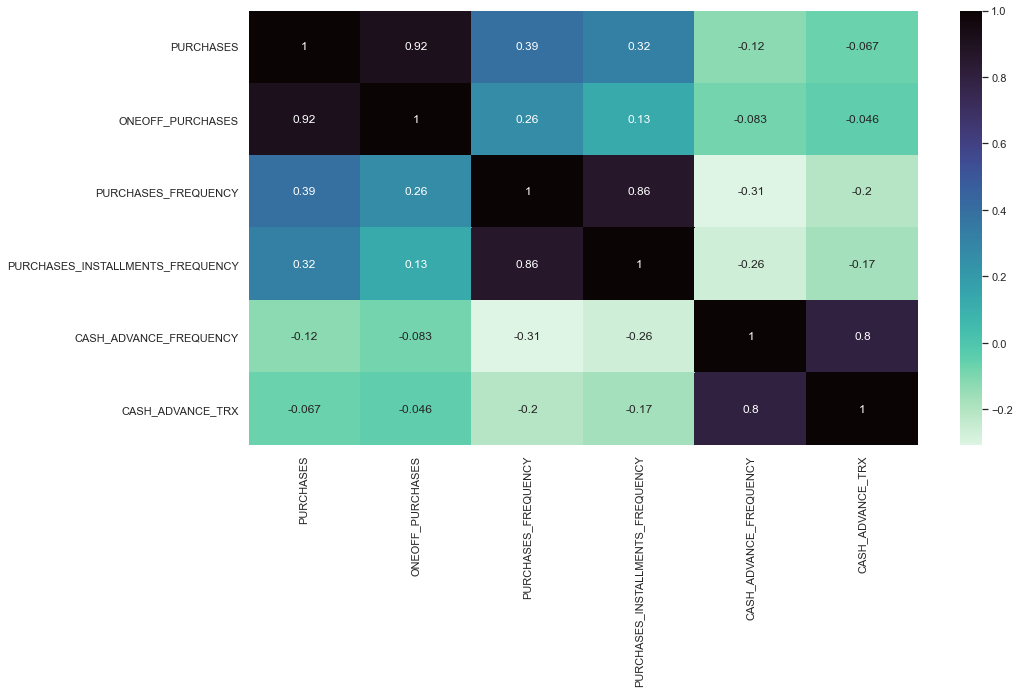

In [9]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df[['PURCHASES', 'ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX']].corr(), annot = True, cmap = 'mako_r')

In [10]:
df.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX'], axis =1,
       inplace = True)

In [11]:
scaler    = StandardScaler()
scaled_df = scaler.fit_transform(df)

normalized_df = normalize(scaled_df)

In [12]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)

In [13]:
X_principal = pd.DataFrame(X_principal, columns = ['P1', 'P2'])
X_principal

,P1,P2
0,-0.504469,-0.657679
1,-0.420145,0.667458
2,0.625856,0.275525
3,-0.421951,-0.045349
4,-0.542687,-0.444858
...,...,...
8945,0.365715,-0.573896
8946,0.199364,-0.547285
8947,0.136979,-0.764214
8948,-0.604372,-0.496597


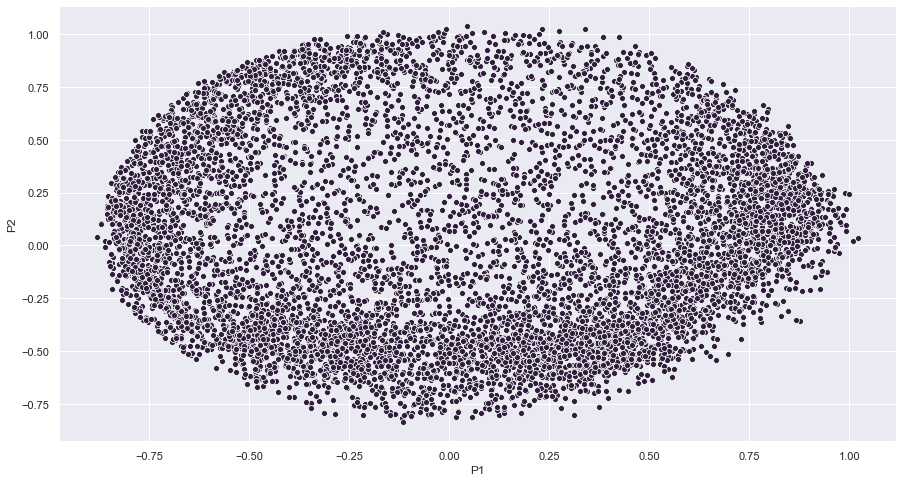

In [14]:
sns.scatterplot(x = 'P1', y = 'P2', data = X_principal)

## Elbow Criterion

In [15]:
elbow = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(X_principal)
    
    elbow[k] = kmeans.inertia_

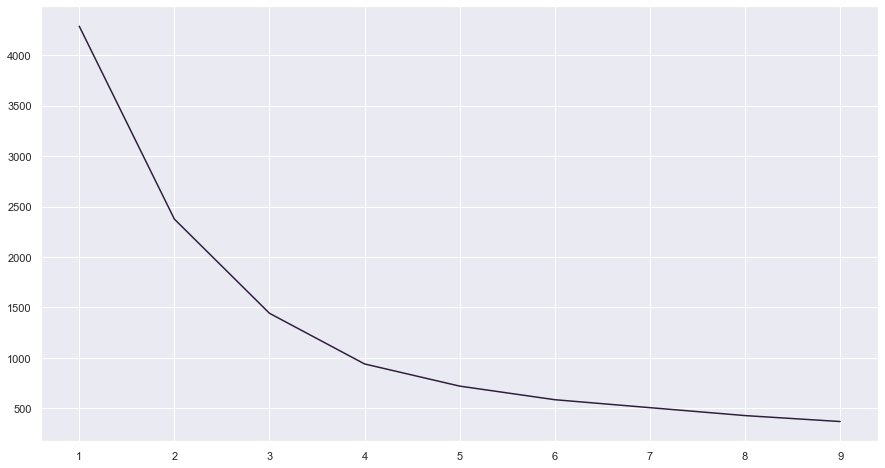

In [16]:
sns.lineplot(x = list(elbow.keys()), y = list(elbow.values()))

<h2 style = "text-align: center; font-size: 30px">Métricas</h2>

<p style = "font-size: 12px"><b>Métricas externas:</b>
<br>precisam ter labels para validar
</p>

<p style = "font-size: 12px"><b>Métricas internas:</b>
<br>não precisam ter labels para validar
</p>



<h2 style = "text-align: center; font-size: 25px">Silhouette-Score</h2>

<p>The Silhouette Coefficient is defined for each sample and is composed of two scores(shown in below), and a higher Silhouette Coefficient score relates to a model with better defined clusters.</p>

<br><p><b>a:</b> The mean distance between a sample and all other points in the same class. This score measure the closeness of points in the same cluster.</p>
<br><p><b>b:</b> The mean distance between a sample and all other points in the next nearest cluster. This score measure the distance of points of different clusters.</p>

<img src = "https://miro.medium.com/max/875/1*ejVx4QIuWyJENBhBjQv5pg.png">

<br><li>Advantages</li>
<ol><li>The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.</li>
<li>The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.</li>
</ol>

<br><li>Drawbacks</li>
<ol><li>The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.</li>
<li>High computational complexity: <b>O(n²)</b>
 </li>
</ol>

In [17]:
silhouette = {}

for n in range(2, 8):
    kmeans        = KMeans(n_clusters = n, max_iter = 1000)
    silhouette[n] = silhouette_score(X_principal, kmeans.fit_predict(X_principal))

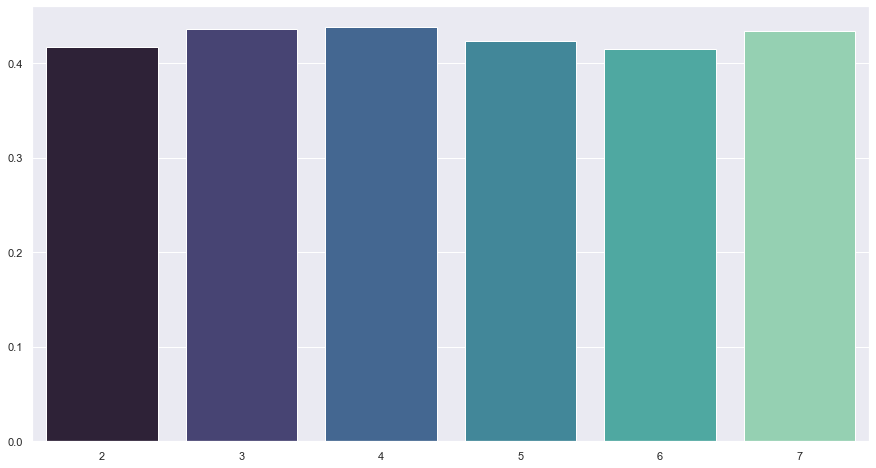

In [18]:
sns.barplot(x = list(silhouette.keys()), y = list(silhouette.values()))

<h2 style = "text-align: center; font-size: 25px">Davies-Bouldin Index</h2>

<p>This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters.</p>

<img src = "https://miro.medium.com/max/875/1*gdUH2wVa3ZynpLlTyxFYyQ.png">

<br><li>Advantages</li>
<ol><li>The computation of Davies-Bouldin is simpler than that of Silhouette scores.</li>
<li>The index is computed only quantities and features inherent to the dataset.</li>
</ol>
<br><li>Drawbacks</li>
<ol><li>The usage of centroid distance limits the distance metric to Euclidean space.</li>
<li>The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN. </li>
</ol>

In [19]:
score_dbs = {}

for n in range(2, 8):
    kmeans        = KMeans(n_clusters = n, max_iter = 1000)
    score_dbs[n]  = davies_bouldin_score(X_principal, kmeans.fit_predict(X_principal))

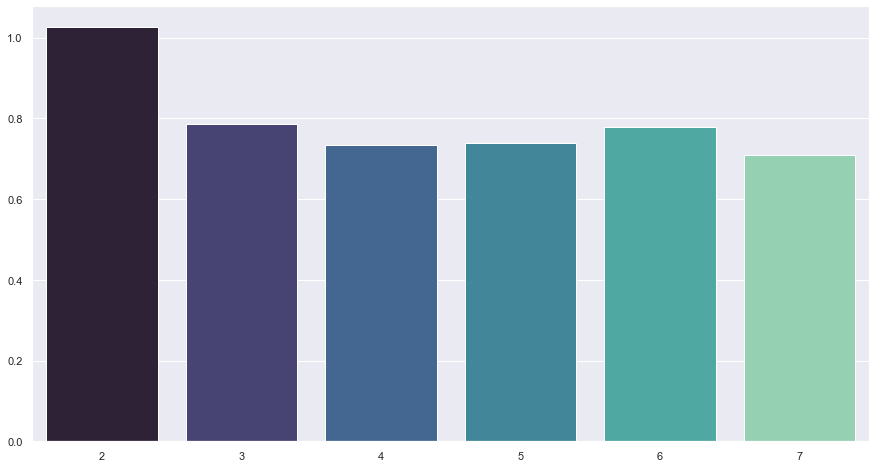

In [20]:
sns.barplot(x = list(score_dbs.keys()), y = list(score_dbs.values()))

O número de clusters pelo davies-bouldin confirmou o silhouette-score, que foi de 3 clusters

<h2 style = "text-align: center; font-size = 25px">Calinski-Harabasz Index</h2>

<p>The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.</p>

<img src = "https://miro.medium.com/max/875/1*7FFwFXlz7tMPqZqT72vPiA.png">

<br><li>Advantages</li>
<ol><li>The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.</li>
<li>The score is fast to compute.</li>
</ol>
<br><li>Drawbacks</li>
<ol><li>The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.</li>

In [21]:
score_calinski = {}

for n in range(2, 15):
    kmeans             = KMeans(n_clusters = n, max_iter = 1000)
    score_calinski[n]  = calinski_harabasz_score(X_principal, kmeans.fit_predict(X_principal))

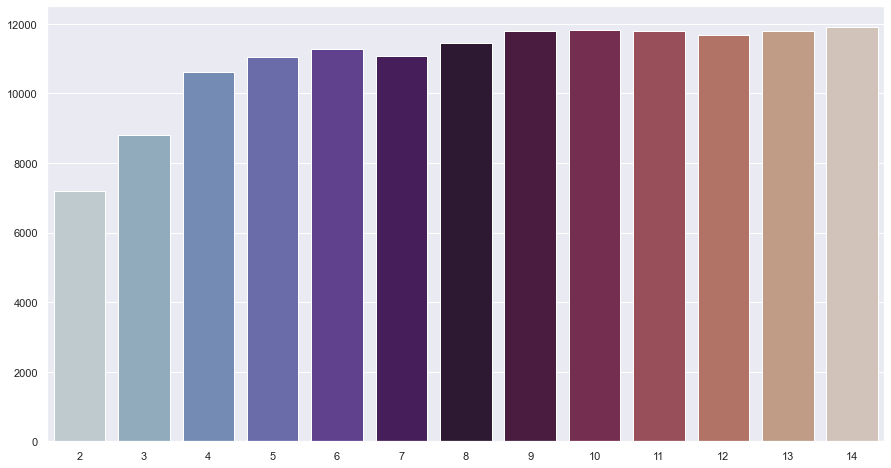

In [22]:
sns.barplot(x = list(score_calinski.keys()), y = list(score_calinski.values()),
           palette = 'twilight')

<h2>KMeans-Optimized</h2>

In [23]:
kmeans = KMeans(n_clusters = 3, max_iter = 1000)
labels = kmeans.fit_predict(X_principal)

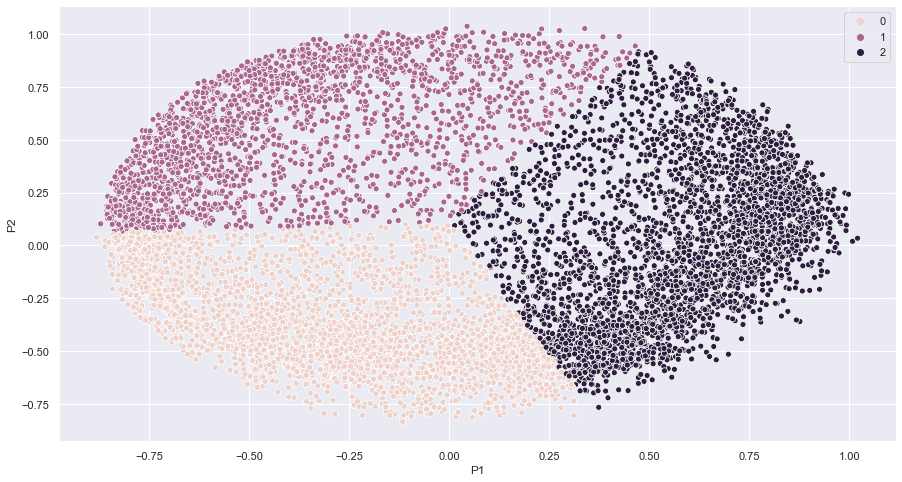

In [24]:
sns.scatterplot(X_principal['P1'], X_principal['P2'], hue = labels)

In [25]:
df['CLUSTERS'] = labels

In [26]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CLUSTERS
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,1
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,2
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,6,1000.0,325.594462,48.886365,0.500000,2
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,6,1000.0,275.861322,312.343947,0.000000,0
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,0,500.0,52.549959,55.755628,0.250000,0


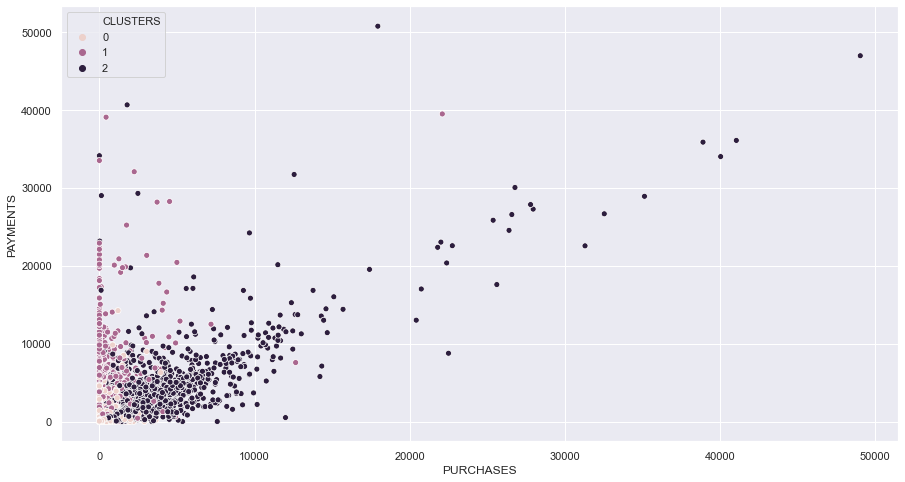

In [27]:
sns.scatterplot(df['PURCHASES'], df['PAYMENTS'], hue = df.CLUSTERS)

<p style = "font-size: 12px">
    O grupo 2 tem uma tendência maior a fazer o pagamento dos valores gastos
</p>

In [35]:
df.groupby('CLUSTERS').size()

CLUSTERS
0    3303
1    2216
2    3431
dtype: int64

In [29]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'CLUSTERS'],
      dtype='object')

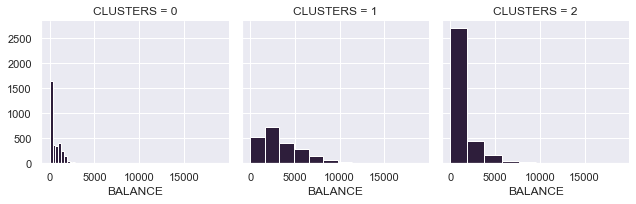

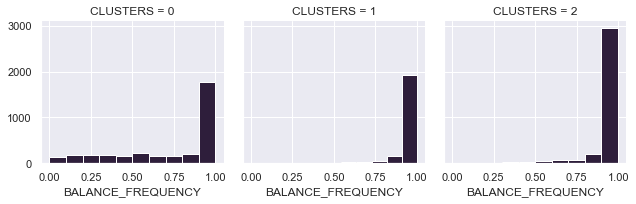

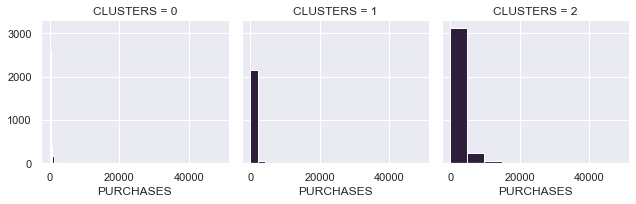

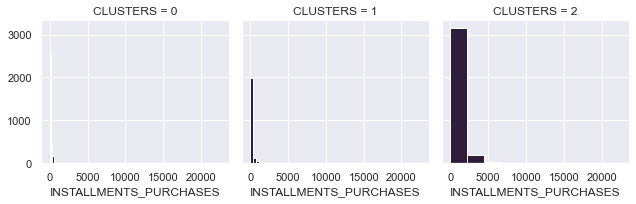

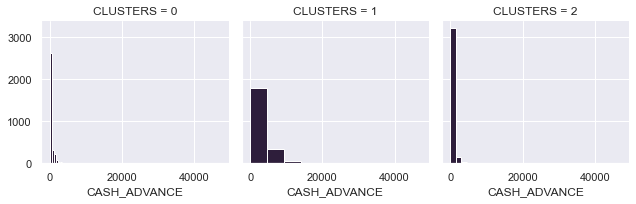

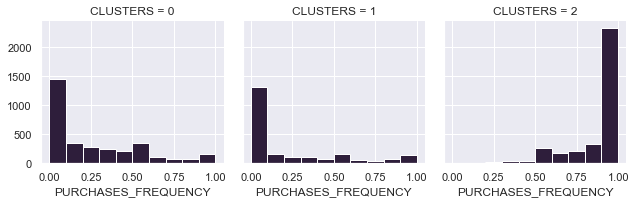

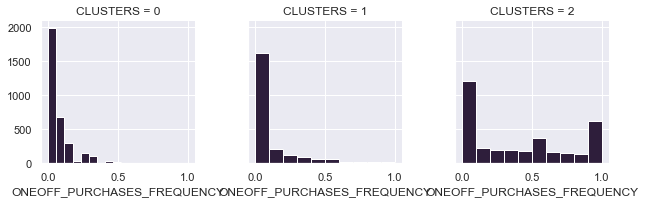

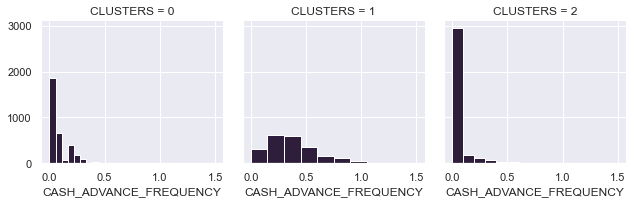

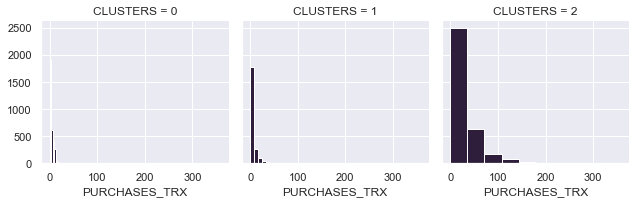

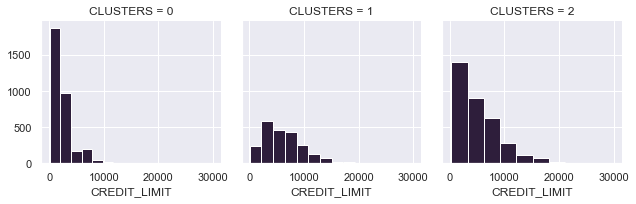

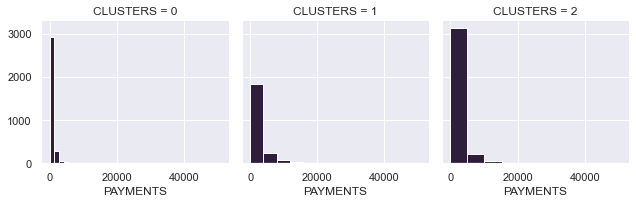

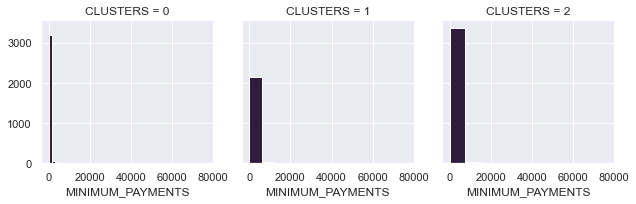

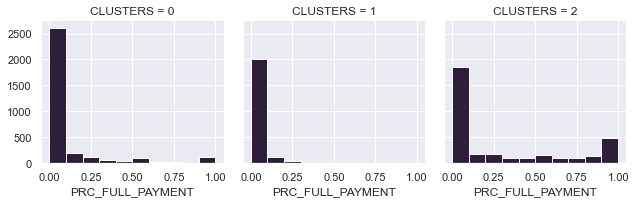

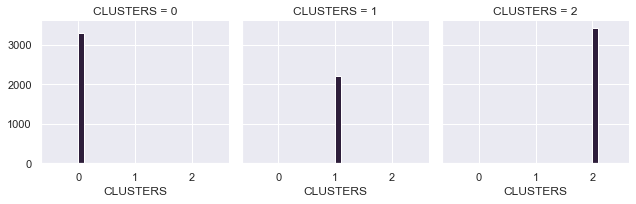

In [30]:
for c in df:
    grid= sns.FacetGrid(df, col='CLUSTERS')
    grid.map(plt.hist, c)